### 📊 Mean-Variance Analysis

This project applies Mean-Variance Analysis (MVA), a core concept in Modern Portfolio Theory (MPT).

🏦 Purpose: To show how investors can balance risk (variance/volatility) and return (expected mean) when building portfolios.

📈 What it does:

- Computes expected returns of assets.
- Calculates variance & covariance between assets.
- Optimizes portfolio weights to minimize risk for a given return.
- Plots the Efficient Frontier (the set of optimal portfolios).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

[ mu1, mu2, sigma1, sigma2, rho] = [ 1.08, 1.16, 0.25, 0.35, 0.30 ]

# compute covariance
cov_12 = rho * sigma1 * sigma2

# compute covariance matrix
covar_matrix = np.array([ sigma1**2, cov_12, cov_12, sigma2**2 ]).reshape(2, 2)

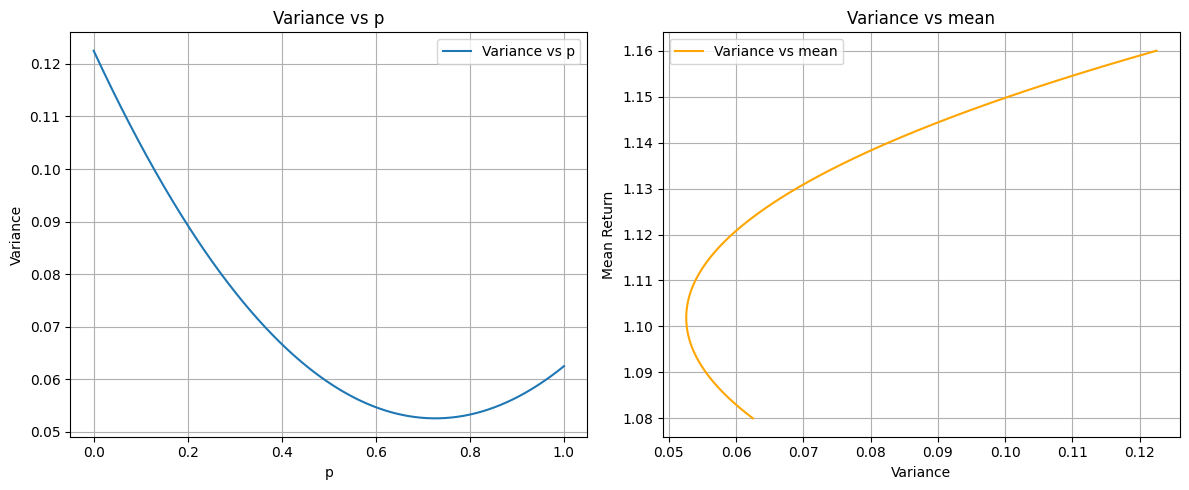

Optimal p: 0.727, Minimum Variance: 0.053, Mean Return: 1.102


In [2]:
# Method 1: We simply vary p from 0 to 1 and compute variance and mean for each p, and see which p gets us the minimum variance for a given mean.
# We can do this because there are only 2 assets, if there are more than 2 assets then it would be too difficult for this
def getVar(p):
    pi_vector = np.array([ p, 1 - p ])
    return np.dot(pi_vector, np.dot(covar_matrix, pi_vector))

def getMean(p):
    mu_vector = np.array([ mu1, mu2 ])
    pi_vector = np.array([ p, 1 - p ])
    return np.dot(pi_vector, mu_vector)

p_values = np.linspace(0, 1, 1000)
var_values = [ getVar(p) for p in p_values ]
mean_values = [ getMean(p) for p in p_values ]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot the first graph
axes[0].plot(p_values, var_values, label="Variance vs p")
axes[0].set_title("Variance vs p")
axes[0].set_xlabel("p")
axes[0].set_ylabel("Variance")
axes[0].grid(True)
axes[0].legend()

# Plot the second graph
axes[1].plot(var_values, mean_values, label="Variance vs mean", color="orange")
axes[1].set_title("Variance vs mean")
axes[1].set_xlabel("Variance")
axes[1].set_ylabel("Mean Return")
axes[1].grid(True)
axes[1].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

min_var = min(var_values)
min_index = var_values.index(min_var)
p = p_values[min_index]
mean = mean_values[min_index]
print(f"Optimal p: {p:.3f}, Minimum Variance: {min_var:.3f}, Mean Return: {mean:.3f}")


In [3]:
# Method 2: We assign a target mean and compute the optimal p that minimizes variance for that mean.

mu_vector = np.array([ mu1, mu2 ])
covar_matrix_inv = np.linalg.inv(covar_matrix)
lota = np.array([ 1, 1 ])

A = np.dot(mu_vector, np.dot(covar_matrix_inv, mu_vector))
B = np.dot(mu_vector, np.dot(covar_matrix_inv, lota))
C = np.dot(lota, np.dot(covar_matrix_inv, lota))

In [4]:
# We define the formula to get back the pi vector and the variance
def getpvector(sigma, gamma, covar_matrix_inv, mu_vector, lota):
    return sigma * np.dot(covar_matrix_inv, mu_vector) + gamma * ( np.dot(lota, covar_matrix_inv))

def getVar(mu_target, A, B, C):
    sigma = ( C * mu_target - B ) / (A*C - B**2)
    gamma = ( A - B*mu_target ) / (A*C - B**2 )
    var = ( C * mu_target** 2 - 2 * B*mu_target + A ) / (A*C - B ** 2)
    return [ sigma, gamma, var ]

In [5]:
# Assuming mu is mu target
mu_target = B/C

sigma, gamma, var = getVar(mu_target, A, B, C)

p = getpvector(sigma, gamma, covar_matrix_inv, mu_vector, lota)

mean = np.dot(p, mu_vector)

print(f"Optimal p: {p}, Minimum Variance: {var:.3f}, Mean Return: {mean:.3f}")

Optimal p: [0.72641509 0.27358491], Minimum Variance: 0.053, Mean Return: 1.102


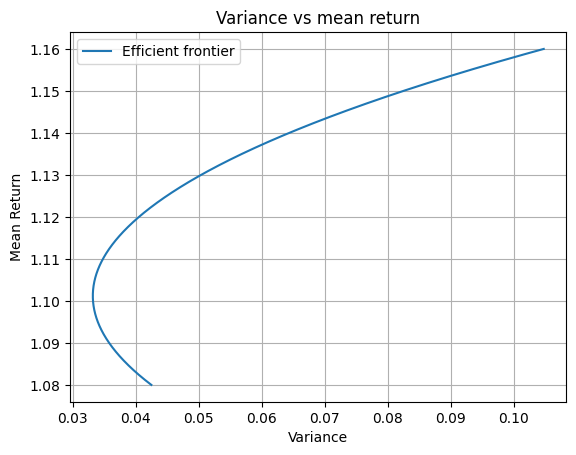

In [6]:
# Part 2:
[ mu1, mu2, mu3, sigma1, sigma2, sigma3, rho12] = [ 1.08, 1.16, 1.1, 0.25, 0.35, 0.3, 0.30 ]

# compute covariance matrix
covar_matrix = np.array( [
    [ sigma1**2, cov_12, 0],
    [ cov_12, sigma2**2, 0 ],
    [ 0, 0 , sigma3**2 ] ] )

mu_vector = np.array([ mu1, mu2, mu3 ])
lota = np.array([ 1, 1, 1 ])
covar_matrix_inv = np.linalg.inv(covar_matrix)

A = np.dot(mu_vector, np.dot(covar_matrix_inv, mu_vector))
B = np.dot(mu_vector, np.dot(covar_matrix_inv, lota))
C = np.dot(lota, np.dot(covar_matrix_inv, lota) )

sigma_values = []
gamma_values = []
var_values = []

p_vectors = []

# We built the target mean vector by varying the mean from lowest asset to highest mean return asset
mu_target_vector = np.linspace( min(mu1, mu2, mu3), max(mu1, mu2, mu3), 1000)

for mu_target in mu_target_vector:
    sigma, gamma, var = getVar(mu_target, A, B, C)
    sigma_values.append(sigma)
    gamma_values.append(gamma)
    var_values.append(var)
    p_vectors.append( getpvector(sigma, gamma, covar_matrix_inv, mu_vector, lota) )

plt.plot(var_values, mu_target_vector, label="Efficient frontier")
plt.title("Variance vs mean return")
plt.xlabel("Variance")
plt.ylabel("Mean Return")
plt.grid(True)
plt.legend()
plt.show()


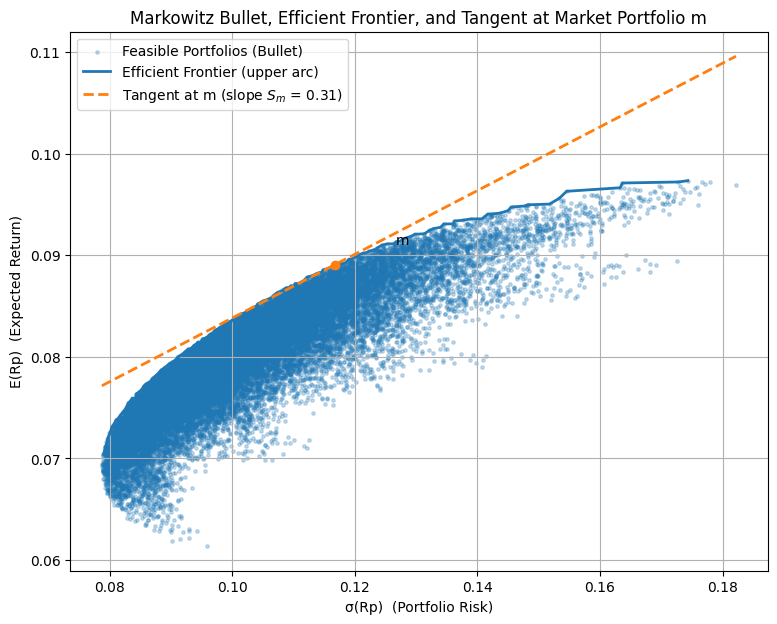

In [7]:
# Requires: numpy, matplotlib
# pip install numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt

# --- Reproducibility
rng = np.random.default_rng(7)

# --- Set up a small universe of risky assets ---
n_assets = 5
mu  = np.array([0.06, 0.08, 0.10, 0.07, 0.09])   # expected returns
vol = np.array([0.10, 0.15, 0.20, 0.12, 0.18])   # standard deviations

# Correlation matrix (moderate correlations)
base_corr = 0.2
Corr = np.full((n_assets, n_assets), base_corr)
np.fill_diagonal(Corr, 1.0)

# Covariance matrix
Sigma = np.outer(vol, vol) * Corr

# --- Monte Carlo portfolios to draw the "bullet" ---
n_port = 30_000
# Long-only, fully invested weights via Dirichlet
weights = rng.dirichlet(np.ones(n_assets), size=n_port)

# Portfolio expected returns and risks
rets   = weights @ mu
vars_  = np.einsum('ij,jk,ik->i', weights, Sigma, weights)  # w Σ w
sigmas = np.sqrt(vars_)

# --- Approximate efficient frontier (upper envelope) ---
# Bin by sigma and take the max return per bin to trace the upper arc
bins = np.linspace(sigmas.min(), sigmas.max(), 300)
digitized = np.digitize(sigmas, bins)
frontier_sigma, frontier_ret = [], []
for b in range(1, len(bins) + 1):
    mask = digitized == b
    if np.any(mask):
        s_bin = sigmas[mask]
        r_bin = rets[mask]
        idx = np.argmax(r_bin)
        frontier_sigma.append(s_bin[idx])
        frontier_ret.append(r_bin[idx])

frontier_sigma = np.array(frontier_sigma)
frontier_ret   = np.array(frontier_ret)

# Sort by sigma and enforce monotone upper envelope
order   = np.argsort(frontier_sigma)
s_sorted = frontier_sigma[order]
r_sorted = frontier_ret[order]
r_cummax = np.maximum.accumulate(r_sorted)
keep = np.diff(np.r_[[-np.inf], r_cummax]) > 1e-10
s_eff = s_sorted[keep]
r_eff = r_cummax[keep]

# --- Choose a "market" portfolio point on the frontier ---
idx_m  = int(0.65 * (len(s_eff) - 1))
sigma_m = s_eff[idx_m]
E_m     = r_eff[idx_m]

# --- Compute local slope S_m at m (numerical derivative) ---
i0 = max(1, idx_m - 1)
i1 = min(len(s_eff) - 2, idx_m + 1)
dE = r_eff[i1] - r_eff[i0]
dS = s_eff[i1] - s_eff[i0]
S_m = dE / dS if dS != 0 else 0.0

# Tangent line at m
sigma_line = np.linspace(sigmas.min(), sigmas.max(), 400)
E_tangent  = E_m + S_m * (sigma_line - sigma_m)

# --- Plot ---
plt.figure(figsize=(9, 7))
plt.scatter(sigmas, rets, s=6, alpha=0.25, label="Feasible Portfolios (Bullet)")
plt.plot(s_eff, r_eff, linewidth=2.0, label="Efficient Frontier (upper arc)")
plt.plot(sigma_line, E_tangent, linestyle="--", linewidth=2.0,
         label=f"Tangent at m (slope $S_m$ = {S_m:.2f})")
plt.scatter([sigma_m], [E_m], zorder=5)
plt.text(sigma_m + 0.01, E_m + 0.002, "m", fontsize=10)

plt.xlabel("σ(Rp)  (Portfolio Risk)")
plt.ylabel("E(Rp)  (Expected Return)")
plt.title("Markowitz Bullet, Efficient Frontier, and Tangent at Market Portfolio m")
plt.legend()
plt.grid(True)
plt.show()

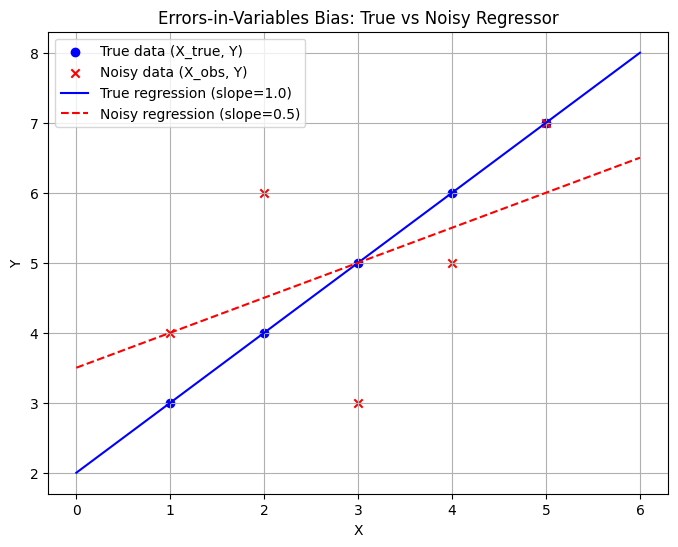

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# --- True relationship ---
X_true = np.array([1, 2, 3, 4, 5])
Y = 2 + 1 * X_true   # true slope = 1, intercept = 2

# --- Observed noisy X ---
X_obs = np.array([3, 1, 4, 2, 5])   # X_true plus noise

# --- Fit regressions ---
# True regression line (Y on X_true)
coef_true = np.polyfit(X_true, Y, 1)   # slope, intercept
line_true = np.poly1d(coef_true)

# Regression with noisy X (Y on X_obs)
coef_obs = np.polyfit(X_obs, Y, 1)
line_obs = np.poly1d(coef_obs)

# --- Plot ---
plt.figure(figsize=(8,6))

# Scatter plots
plt.scatter(X_true, Y, color="blue", label="True data (X_true, Y)")
plt.scatter(X_obs, Y, color="red", marker="x", label="Noisy data (X_obs, Y)")

# Regression lines
x_range = np.linspace(0, 6, 100)
plt.plot(x_range, line_true(x_range), color="blue", linestyle="-",
         label=f"True regression (slope={coef_true[0]:.1f})")
plt.plot(x_range, line_obs(x_range), color="red", linestyle="--",
         label=f"Noisy regression (slope={coef_obs[0]:.1f})")

# Labels and title
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Errors-in-Variables Bias: True vs Noisy Regressor")
plt.legend()
plt.grid(True)
plt.show()